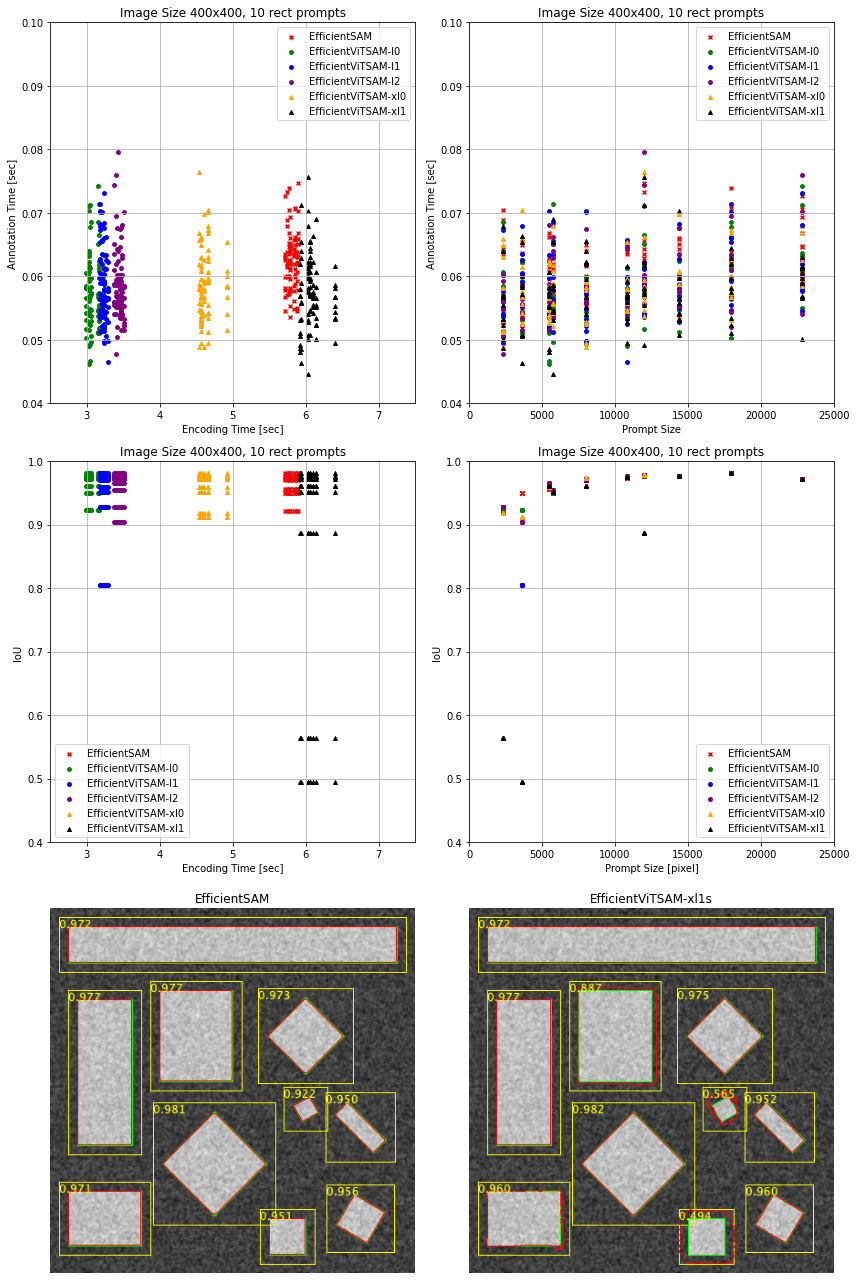

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

df = pd.read_csv('Variability-Models/result-Variability-Models.csv')
models = df["Model"].to_numpy()
unique_models = np.unique(models)
nrows = len(models)

#
nobjects = 10

def extract_models(header, unique_models):
    data_float = df[header].to_numpy().astype(float)
    data_list = {model: [] for model in unique_models}
    for model, data_item in zip(models, data_float):
        data_list[model].append(data_item)
    data_model = []
    for model in np.unique(models):
        data_model.append(np.array(data_list[model]))
    return data_model 

annotation_model = extract_models("Annotation", unique_models)
encoding_model = extract_models("Encoding", unique_models)
iou_model = extract_models("IoU", unique_models)
prompt_model = extract_models("Prompt", unique_models)

fig, axs = plt.subplots(3, 2, figsize=(12, 18))
num_columns = len(encoding_model)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
markers = ['x', 'o', 'o', 'o', '^', '^']
s = 15
for i in range(num_columns): 
    axs[0,0].scatter(encoding_model[i][nobjects:], annotation_model[i][nobjects:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')
    axs[0,1].scatter(prompt_model[i][nobjects:], annotation_model[i][nobjects:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')
    axs[1,0].scatter(encoding_model[i][nobjects:], iou_model[i][nobjects:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')
    axs[1,1].scatter(prompt_model[i][nobjects:], iou_model[i][nobjects:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')

axs[0,0].set_title(f"Image Size 400x400, 10 rect prompts")
axs[0,0].set_xlabel('Encoding Time [sec]')
axs[0,0].set_xlim([2.5, 7.5])
axs[0,0].set_ylabel('Annotation Time [sec]')
axs[0,0].set_ylim([0.04, 0.1])
axs[0,0].grid(True)
axs[0,0].legend()

axs[0,1].set_title(f"Image Size 400x400, 10 rect prompts")
axs[0,1].set_xlabel('Prompt Size')
axs[0,1].set_xlim([0, 25000])
axs[0,1].set_ylabel('Annotation Time [sec]')
axs[0,1].set_ylim([0.04, 0.1])
axs[0,1].grid(True)
axs[0,1].legend()

axs[1,0].set_title(f"Image Size 400x400, 10 rect prompts")
axs[1,0].set_xlabel('Encoding Time [sec]')
axs[1,0].set_xlim([2.5, 7.5])
axs[1,0].set_ylabel('IoU')
axs[1,0].set_ylim([0.4, 1])
axs[1,0].grid(True)
axs[1,0].legend()

axs[1,1].set_title(f"Image Size 400x400, 10 rect prompts")
axs[1,1].set_xlabel('Prompt Size [pixel]')
axs[1,1].set_xlim([0, 25000])
axs[1,1].set_ylabel('IoU')
axs[1,1].set_ylim([0.4, 1])
axs[1,1].grid(True)
axs[1,1].legend()


axs[2,0].imshow(mpimg.imread('Variability-Models/results-EfficientSAM-128-160000.png'))
axs[2,0].axis('off')
axs[2,0].set_title(f"EfficientSAM")

axs[2,1].imshow(mpimg.imread('Variability-Models/results-EfficientViTSAM-xl1-128-160000.png'))
axs[2,1].axis('off')
axs[2,1].set_title(f"EfficientViTSAM-xl1s")

plt.tight_layout()
plt.savefig('Figure-Variability-Models.pdf')
plt.show()